### **Deep Learning model to predict google stock price based on past stock price values.**
---
### **Steps:**
1. Import Needed Libraries
2. Data Preprocessing
  1. Importing needed dataset
  2. Feature sscaling
  3. Creating data struccture with timesteps
  4. Reshaping (important)
3. Building RNN Model
  1. Importing needed keras libraries
  2. Initializing rnn
  3. Adding 1st LSTM layer & dropout
  4. Adding 2nd LSTM layer & dropout
  5. Adding 3rd LSTM layer & dropout
  6. Adding 4th LSTM layer & dropout
  7. Adding output layer
4. Training RNN Model
  1. Compiling crnn
  2. Fitting rnn to training set
5. Making Predictions & visualizing results
  1. Getting real stock price - test set
  2. Getting predictedd stock price
  3. Visualizing results

In [1]:
# Here we are going to predict google stock price value for the future
# using recurrent neural network.

In [2]:
# 1. importing needed libraries
# since rnn only accept numpy array as input numpy is essential to build a rnn model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [3]:
# 2. data preprocessing
# 2.1 .importing the dataset

df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# 2.2. Feature scaling
# standardisation & normalisation are two best methods in feature scaling
# while building rnn if sigmoid fn present as activation fn in output layer it is recommended to use normalisation

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
# 2.3. creating data structure with 60 timesteps & 1 output
# you have to choose timesteps by experimenting different values

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
print(X_train)
print()
print(y_train)


[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [8]:
# 2.4. reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# 3. building rnn
# 3.1. import needed keras libraries & packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# 3.2. initialize rnn

regressor = Sequential()

In [11]:
# 3.3. adding first lstm layer & some dropout regularization
# we are adding dropout to avoidoverfitting

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# 3.4. adding second lstm layer & some dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# 3.5. adding third lstm layer & some dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# 3.6. adding fourth lstm layer & some dropout regularization

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# 3.7. adding output layer

regressor.add(Dense(units = 1))

In [16]:
# 4. training rnn model
# 4.1. compiling rnn

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# 4.2. fitting rnn to training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 189ms/step - loss: 0.0783
Epoch 2/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0057
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0055
Epoch 13/100

In [18]:
# 5. making predictions and visualizing results
# 5.1. getting real stock price

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# 5.2. getting predicted stock price 

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

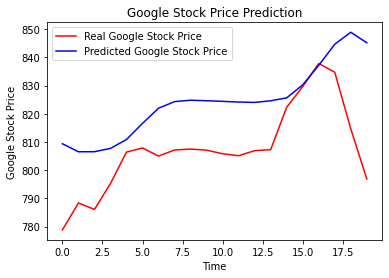

In [20]:
# 5.3. visualizing results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [21]:
# yes, successfully implemented our rnn model to predict google stock price.